In [4]:
import pandas as pd

In [5]:
def load_data(fileName):
    return pd.read_csv(fileName)

In [6]:
fileName = "titanic_disaster.csv"
tidisater = load_data(fileName)
tidisater.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

dfage PassengerId    177
Survived       177
Pclass         177
Name           177
Sex            177
Age              0
SibSp          177
Parch          177
Ticket         177
Fare           177
Cabin           19
Embarked       177
dtype: int64
--------------
dfcabin PassengerId    687
Survived       687
Pclass         687
Name           687
Sex            687
Age            529
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin            0
Embarked       687
dtype: int64
--------------
dfembarked PassengerId    2
Survived       2
Pclass         2
Name           2
Sex            2
Age            2
SibSp          2
Parch          2
Ticket         2
Fare           2
Cabin          2
Embarked       0
dtype: int64


<Axes: >

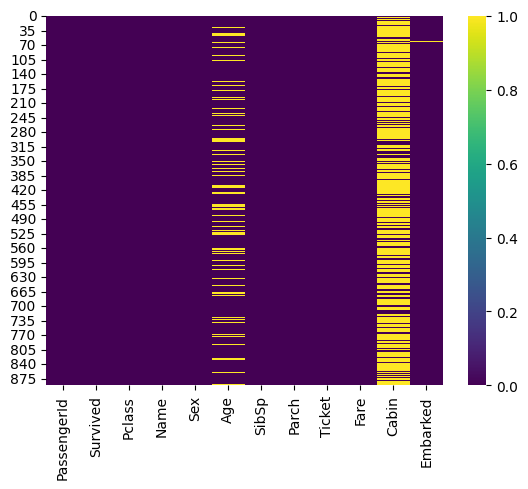

In [7]:
dfage = tidisater[tidisater['Age'].isna()]
print("dfage", dfage.count())

dfcabin = tidisater[tidisater['Cabin'].isna()]
print("--------------")
print("dfcabin", dfcabin.count())

dfembarked = tidisater[tidisater['Embarked'].isna()]
print("--------------")
print("dfembarked", dfembarked.count())


import seaborn as sns
sns.heatmap(tidisater.isna(), cmap='viridis')

# 3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

In [ ]:

tidisater[['Firstname', 'secondName']]=tidisater['Name'].str.split(",",expand = True)
tidisater_splitName = tidisater.drop("Name", axis=1)
tidisater_splitName.head(5)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  Firstname  \
0         A/5 21171   7.2500   NaN        S     Braund   
1          PC 17599  71.2833   C85        C    Cumings   
2  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3            113803  53.1000  C123        S   Futrelle   
4            373450   8.0500   NaN        S      Allen   

                                    secondName  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henry

# 4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male → M và female → F

In [ ]:

def substitute_sex(x_df):
    mapping = {'male':'M','female':'F'}
    x_df['Sex']=x_df['Sex'].map(mapping)
    return x_df

    

In [10]:
tidisaster5 = tidisater_splitName.pipe(substitute_sex)
tidisaster5

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F   NaN      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  Firstname  \
0     7.2500   NaN        S     Braund   
1    71.2833   C85        C    Cumings   
2     7.9250   NaN        S  Heikkinen   
3    53.1000  C123        S   Futrelle   
4     8.0500   NaN        S      Allen   
..       ...   ...      ...        ...   
886  13.0000   NaN        S   Montvila   
887  30.0000   B42        S     Graham   
888  23.4500   NaN        S   Johnston   
889  30.0000  C148        C       Behr   
890   7.7500   NaN        Q     Dooley   

                                      secondName  
0                                Mr. Owen Harris  
1     Mrs. John Bradley (Florence Briggs Thayer)  
2                                    Miss. Laina  
3             Mrs. Jacques Heath (Lily May Peel)  
4                              Mr. William Henry  
..                                           ...  
886                                  Rev. Juozas  
887                         Miss. Margaret Edith  
888               Miss. Catherine Helen "Carrie"  
889                              Mr. Karl Howell  
890                                  Mr. Patrick  

[891 rows x 13 columns]

# 5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass)

# a. Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân
# phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm
# hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu.

<Axes: xlabel='Pclass', ylabel='Age'>

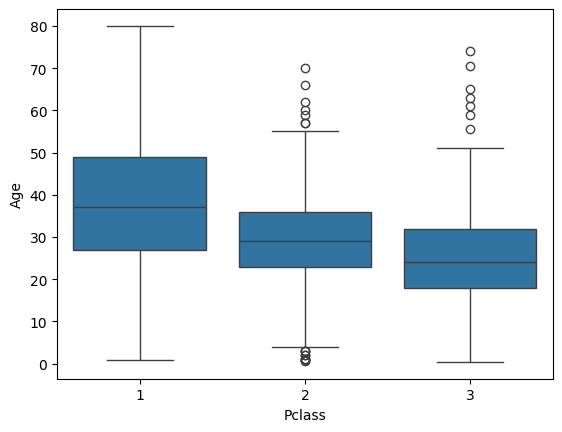

In [ ]:

import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data = tidisaster5)

# Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực
# quan dữ liệu đã xử lý thiếu cho cột’Age’ bằng biểu đồ Heat map

# tidisater['Age'].fillna(round(tidisater['Age'].mean()), inplace= False)
# tidisater.head(10)

In [ ]:


tidisaster5.loc[tidisaster5['Pclass'] == 1, 'Age'] = tidisaster5.loc[tidisaster5['Pclass'] == 1, 'Age'].fillna(tidisaster5.loc[tidisaster5['Pclass'] == 1, 'Age'].median())
tidisaster5.loc[tidisaster5['Pclass'] == 2, 'Age'] = tidisaster5.loc[tidisaster5['Pclass'] == 2, 'Age'].fillna(tidisaster5.loc[tidisaster5['Pclass'] == 2, 'Age'].median())
tidisaster5.loc[tidisaster5['Pclass'] == 3, 'Age'] = tidisaster5.loc[tidisaster5['Pclass'] == 3, 'Age'].fillna(tidisaster5.loc[tidisaster5['Pclass'] == 3, 'Age'].median())

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(tidisaster5.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

<Axes: >

# 6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa
# trên độ tuổi của hành khách như sau: (age =< 12] → Kid; (12, 18]: Teen, (18, 60]: Adult
# và ( age > 60): Older

In [ ]:


tidisaster5.loc[(tidisaster5['Age'] <= 12), 'Agegroup'] = 'Kid'
tidisaster5.loc[(tidisaster5['Age'] > 12) & (tidisaster5['Age'] < 18), 'Agegroup'] = 'Teen'
tidisaster5.loc[(tidisaster5['Age'] >= 18) & (tidisaster5['Age'] <= 60), 'Agegroup'] = 'Adult'
tidisaster5.loc[(tidisaster5['Age'] > 60), 'Agegroup'] = 'Older'

In [15]:
tidisaster5.head(10)

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   
5            6         0       3   M  24.0      0      0            330877   
6            7         0       1   M  54.0      0      0             17463   
7            8         0       3   M   2.0      3      1            349909   
8            9         1       3   F  27.0      0      2            347742   
9           10         1       2   F  14.0      1      0            237736   

      Fare Cabin Embarked  Firstname  \
0   7.2500   NaN        S     Braund   
1  71.2833   C85        C    Cumings   
2   7.9250   NaN        S  Heikkinen   
3  53.1000  C123        S   Futrelle   
4   8.0500   NaN        S      Allen   
5   8.4583   NaN        Q      Moran   
6  51.8625   E46        S   McCarthy   
7  21.0750   NaN        S    Palsson   
8  11.1333   NaN        S    Johnson   
9  30.0708   NaN        C     Nasser   

                                    secondName Agegroup  
0                              Mr. Owen Harris    Adult  
1   Mrs. John Bradley (Florence Briggs Thayer)    Adult  
2                                  Miss. Laina    Adult  
3           Mrs. Jacques Heath (Lily May Peel)    Adult  
4                            Mr. William Henry    Adult  
5                                    Mr. James    Adult  
6                                Mr. Timothy J    Adult  
7                        Master. Gosta Leonard      Kid  
8     Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Adult  
9                  Mrs. Nicholas (Adele Achem)     Teen

# 7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,Mrs, Miss, Master ra khỏi “secondName”

In [ ]:

listNamePrefix=[]
for index,row in tidisaster5.iterrows():
    vitri = row['secondName'].strip().find(' ')
    secondname = row['secondName'].strip()

    namePrefix=secondname[vitri+1:]
    listNamePrefix.append(namePrefix)


In [17]:
cotNamePrefix=pd.DataFrame(listNamePrefix, columns=['namePrefix'])
tidisaster5=pd.concat([tidisaster5,cotNamePrefix],axis=1,sort=False)
tidisaster5

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  Firstname  \
0     7.2500   NaN        S     Braund   
1    71.2833   C85        C    Cumings   
2     7.9250   NaN        S  Heikkinen   
3    53.1000  C123        S   Futrelle   
4     8.0500   NaN        S      Allen   
..       ...   ...      ...        ...   
886  13.0000   NaN        S   Montvila   
887  30.0000   B42        S     Graham   
888  23.4500   NaN        S   Johnston   
889  30.0000  C148        C       Behr   
890   7.7500   NaN        Q     Dooley   

                                      secondName Agegroup  \
0                                Mr. Owen Harris    Adult   
1     Mrs. John Bradley (Florence Briggs Thayer)    Adult   
2                                    Miss. Laina    Adult   
3             Mrs. Jacques Heath (Lily May Peel)    Adult   
4                              Mr. William Henry    Adult   
..                                           ...      ...   
886                                  Rev. Juozas    Adult   
887                         Miss. Margaret Edith    Adult   
888               Miss. Catherine Helen "Carrie"    Adult   
889                              Mr. Karl Howell    Adult   
890                                  Mr. Patrick    Adult   

                                namePrefix  
0                              Owen Harris  
1    John Bradley (Florence Briggs Thayer)  
2                                    Laina  
3            Jacques Heath (Lily May Peel)  
4                            William Henry  
..                                     ...  
886                                 Juozas  
887                         Margaret Edith  
888               Catherine Helen "Carrie"  
889                            Karl Howell  
890                                Patrick  

[891 rows x 15 columns]

# 8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [ ]:

tidisaster5['familySize'] = tidisaster5['SibSp'] + tidisaster5['Parch'] + 1
tidisaster5

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  Firstname  \
0     7.2500   NaN        S     Braund   
1    71.2833   C85        C    Cumings   
2     7.9250   NaN        S  Heikkinen   
3    53.1000  C123        S   Futrelle   
4     8.0500   NaN        S      Allen   
..       ...   ...      ...        ...   
886  13.0000   NaN        S   Montvila   
887  30.0000   B42        S     Graham   
888  23.4500   NaN        S   Johnston   
889  30.0000  C148        C       Behr   
890   7.7500   NaN        Q     Dooley   

                                      secondName Agegroup  \
0                                Mr. Owen Harris    Adult   
1     Mrs. John Bradley (Florence Briggs Thayer)    Adult   
2                                    Miss. Laina    Adult   
3             Mrs. Jacques Heath (Lily May Peel)    Adult   
4                              Mr. William Henry    Adult   
..                                           ...      ...   
886                                  Rev. Juozas    Adult   
887                         Miss. Margaret Edith    Adult   
888               Miss. Catherine Helen "Carrie"    Adult   
889                              Mr. Karl Howell    Adult   
890                                  Mr. Patrick    Adult   

                                namePrefix  familySize  
0                              Owen Harris           2  
1    John Bradley (Florence Briggs Thayer)           2  
2                                    Laina           1  
3            Jacques Heath (Lily May Peel)           2  
4                            William Henry           1  
..                                     ...         ...  
886                                 Juozas           1  
887                         Margaret Edith           1  
888               Catherine Helen "Carrie"           4  
889                            Karl Howell           1  
890                                Patrick           1  

[891 rows x 16 columns]

# 9. Tạo thêm đặc trưng ‘Alone’ để xác định hành khách đi theo nhóm hay cá nhân bằng cáchdựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [ ]:

tidisaster5.loc[(tidisaster5['familySize'] == 0), 'Alone'] = 1
tidisaster5.loc[(tidisaster5['familySize'] > 0), 'Alone'] = 0
tidisaster5

PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0              1         0       3   M  22.0      1      0         A/5 21171   
1              2         1       1   F  38.0      1      0          PC 17599   
2              3         1       3   F  26.0      0      0  STON/O2. 3101282   
3              4         1       1   F  35.0      1      0            113803   
4              5         0       3   M  35.0      0      0            373450   
..           ...       ...     ...  ..   ...    ...    ...               ...   
886          887         0       2   M  27.0      0      0            211536   
887          888         1       1   F  19.0      0      0            112053   
888          889         0       3   F  24.0      1      2        W./C. 6607   
889          890         1       1   M  26.0      0      0            111369   
890          891         0       3   M  32.0      0      0            370376   

        Fare Cabin Embarked  Firstname  \
0     7.2500   NaN        S     Braund   
1    71.2833   C85        C    Cumings   
2     7.9250   NaN        S  Heikkinen   
3    53.1000  C123        S   Futrelle   
4     8.0500   NaN        S      Allen   
..       ...   ...      ...        ...   
886  13.0000   NaN        S   Montvila   
887  30.0000   B42        S     Graham   
888  23.4500   NaN        S   Johnston   
889  30.0000  C148        C       Behr   
890   7.7500   NaN        Q     Dooley   

                                      secondName Agegroup  \
0                                Mr. Owen Harris    Adult   
1     Mrs. John Bradley (Florence Briggs Thayer)    Adult   
2                                    Miss. Laina    Adult   
3             Mrs. Jacques Heath (Lily May Peel)    Adult   
4                              Mr. William Henry    Adult   
..                                           ...      ...   
886                                  Rev. Juozas    Adult   
887                         Miss. Margaret Edith    Adult   
888               Miss. Catherine Helen "Carrie"    Adult   
889                              Mr. Karl Howell    Adult   
890                                  Mr. Patrick    Adult   

                                namePrefix  familySize  Alone  
0                              Owen Harris           2    0.0  
1    John Bradley (Florence Briggs Thayer)           2    0.0  
2                                    Laina           1    0.0  
3            Jacques Heath (Lily May Peel)           2    0.0  
4                            William Henry           1    0.0  
..                                     ...         ...    ...  
886                                 Juozas           1    0.0  
887                         Margaret Edith           1    0.0  
888               Catherine Helen "Carrie"           4    0.0  
889                            Karl Howell           1    0.0  
890                                Patrick           1    0.0  

[891 rows x 17 columns]

# 10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng "Unknown"

In [41]:
tidisaster5['typeCabin'] = tidisaster5['Cabin'].fillna('Unknown')
tidisaster5['typeCabin'] = tidisaster5['typeCabin'].apply(lambda x: x[0] if x != 'Unknown' else x)
typeCabin = tidisaster5['typeCabin']


In [21]:
tidisaster5.head(5)


PassengerId  Survived  Pclass Sex   Age  SibSp  Parch            Ticket  \
0            1         0       3   M  22.0      1      0         A/5 21171   
1            2         1       1   F  38.0      1      0          PC 17599   
2            3         1       3   F  26.0      0      0  STON/O2. 3101282   
3            4         1       1   F  35.0      1      0            113803   
4            5         0       3   M  35.0      0      0            373450   

      Fare Cabin Embarked  Firstname  \
0   7.2500   NaN        S     Braund   
1  71.2833   C85        C    Cumings   
2   7.9250   NaN        S  Heikkinen   
3  53.1000  C123        S   Futrelle   
4   8.0500   NaN        S      Allen   

                                    secondName Agegroup  \
0                              Mr. Owen Harris    Adult   
1   Mrs. John Bradley (Florence Briggs Thayer)    Adult   
2                                  Miss. Laina    Adult   
3           Mrs. Jacques Heath (Lily May Peel)    Adult   
4                            Mr. William Henry    Adult   

                              namePrefix  familySize  Alone typeCabin  
0                            Owen Harris           2    0.0   Unknown  
1  John Bradley (Florence Briggs Thayer)           2    0.0         C  
2                                  Laina           1    0.0   Unknown  
3          Jacques Heath (Lily May Peel)           2    0.0         C  
4                          William Henry           1    0.0   Unknown

# 12. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính

In [ ]:

corSurvivedSex = tidisaster5.groupby(['Survived','Sex'])[['Sex']].count().unstack()


In [23]:
corSurvivedSex


Sex     
Sex         F    M
Survived          
0          81  468
1         233  109

array([<Axes: ylabel='F'>, <Axes: ylabel='M'>], dtype=object)

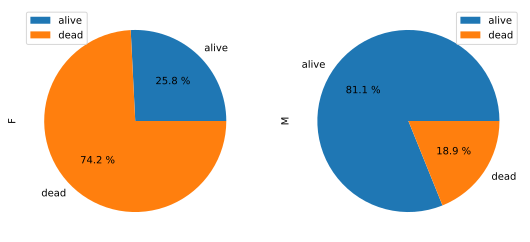

In [24]:
corSurvivedSex['Sex'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(9, 6))


# 13. Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass)

In [ ]:

corSurvivedPclass = tidisaster5.groupby(['Survived','Pclass'])[['Pclass']].count().unstack()


In [26]:
corSurvivedPclass

Pclass         
Pclass        1   2    3
Survived                
0            80  97  372
1           136  87  119

array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>],
      dtype=object)

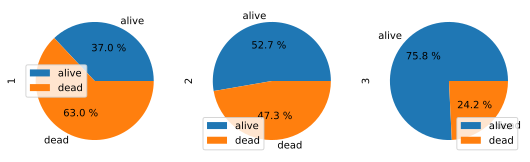

In [27]:
corSurvivedPclass['Pclass'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(9, 6))


# 14. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác

In [ ]:

corSurvivedSexPclass = tidisaster5.groupby(['Survived','Sex','Pclass'])[['Agegroup']].count().unstack()

In [29]:
corSurvivedSexPclass


Agegroup         
Pclass              1   2    3
Survived Sex                  
0        F          3   6   72
         M         77  91  300
1        F         91  70   72
         M         45  17   47

array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>],
      dtype=object)

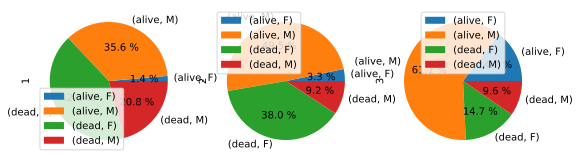

In [30]:
corSurvivedSexPclass['Agegroup'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(9, 6))


# 15. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng

In [ ]:

corSurvivedFamilySize = tidisaster5.groupby(['Survived','familySize'])[['familySize']].count().unstack()


In [32]:
corSurvivedFamilySize

familySize                                             
familySize         1     2     3     4     5     6    7    8    11
Survived                                                          
0               374.0  72.0  43.0   8.0  12.0  19.0  8.0  6.0  7.0
1               163.0  89.0  59.0  21.0   3.0   3.0  4.0  NaN  NaN

array([<Axes: ylabel='1'>, <Axes: ylabel='2'>, <Axes: ylabel='3'>,
       <Axes: ylabel='4'>, <Axes: ylabel='5'>, <Axes: ylabel='6'>,
       <Axes: ylabel='7'>, <Axes: ylabel='8'>, <Axes: ylabel='11'>],
      dtype=object)

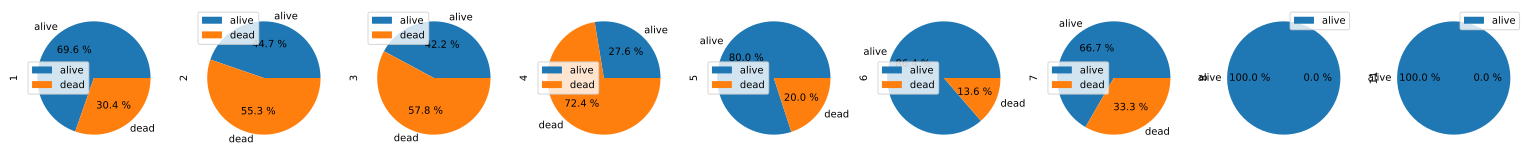

In [33]:
corSurvivedFamilySize['familySize'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(27, 18))


# 16. Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé

In [ ]:

corSurvivedFare = tidisaster5.groupby(['Survived','Fare'])[['Fare']].count().unstack()


In [35]:
corSurvivedFare

Fare                                                        \
Fare     0.0000   4.0125   5.0000   6.2375   6.4375   6.4500   6.4958     
Survived                                                                  
0            14.0      1.0      1.0      1.0      1.0      1.0      2.0   
1             1.0      NaN      NaN      NaN      NaN      NaN      NaN   

                                     ...                                      \
Fare     6.7500   6.8583   6.9500    ... 153.4625 164.8667 211.3375 211.5000   
Survived                             ...                                       
0             2.0      1.0      1.0  ...      1.0      NaN      NaN      1.0   
1             NaN      NaN      NaN  ...      2.0      2.0      3.0      NaN   

                                                                
Fare     221.7792 227.5250 247.5208 262.3750 263.0000 512.3292  
Survived                                                        
0             1.0      1.0      1.0      NaN      2.0      NaN  
1             NaN      3.0      1.0      2.0      2.0      3.0  

[2 rows x 248 columns]

In [36]:
corSurvivedFare['Fare'].rename(index={0:'alive',1:'dead'}).plot.pie(autopct = '%.1f %%', subplots=True, figsize=(90, 60))


array([<Axes: ylabel='0.0'>, <Axes: ylabel='4.0125'>,
       <Axes: ylabel='5.0'>, <Axes: ylabel='6.2375'>,
       <Axes: ylabel='6.4375'>, <Axes: ylabel='6.45'>,
       <Axes: ylabel='6.4958'>, <Axes: ylabel='6.75'>,
       <Axes: ylabel='6.8583'>, <Axes: ylabel='6.95'>,
       <Axes: ylabel='6.975'>, <Axes: ylabel='7.0458'>,
       <Axes: ylabel='7.05'>, <Axes: ylabel='7.0542'>,
       <Axes: ylabel='7.125'>, <Axes: ylabel='7.1417'>,
       <Axes: ylabel='7.225'>, <Axes: ylabel='7.2292'>,
       <Axes: ylabel='7.25'>, <Axes: ylabel='7.3125'>,
       <Axes: ylabel='7.4958'>, <Axes: ylabel='7.5208'>,
       <Axes: ylabel='7.55'>, <Axes: ylabel='7.6292'>,
       <Axes: ylabel='7.65'>, <Axes: ylabel='7.725'>,
       <Axes: ylabel='7.7292'>, <Axes: ylabel='7.7333'>,
       <Axes: ylabel='7.7375'>, <Axes: ylabel='7.7417'>,
       <Axes: ylabel='7.75'>, <Axes: ylabel='7.775'>,
       <Axes: ylabel='7.7875'>, <Axes: ylabel='7.7958'>,
       <Axes: ylabel='7.8'>, <Axes: ylabel='7.8292'>,
    

# 17. Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến (Embarked).

In [ ]:

tidisaster5.groupby(['Pclass','Parch']).Survived.count()



Pclass  Parch
1       0        163
        1         31
        2         21
        4          1
2       0        134
        1         32
        2         16
        3          2
3       0        381
        1         55
        2         43
        3          3
        4          3
        5          5
        6          1
Name: Survived, dtype: int64

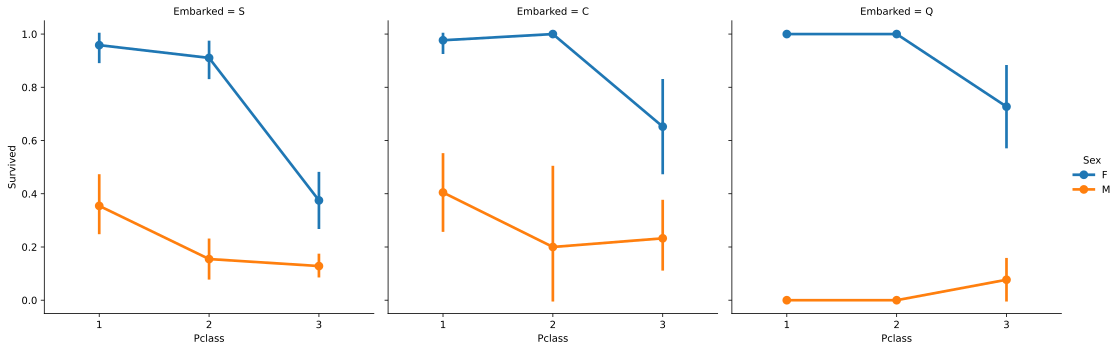

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', 
            data=tidisaster5, kind='point')